In [1]:
using StatsBase

From the calculations of the DFA for the $1744$ orbits, one can fit them into a power law $F(n) \propto n^\alpha$ and find the distribution of $\alpha$ for different orbits.

This is done in the following codes:

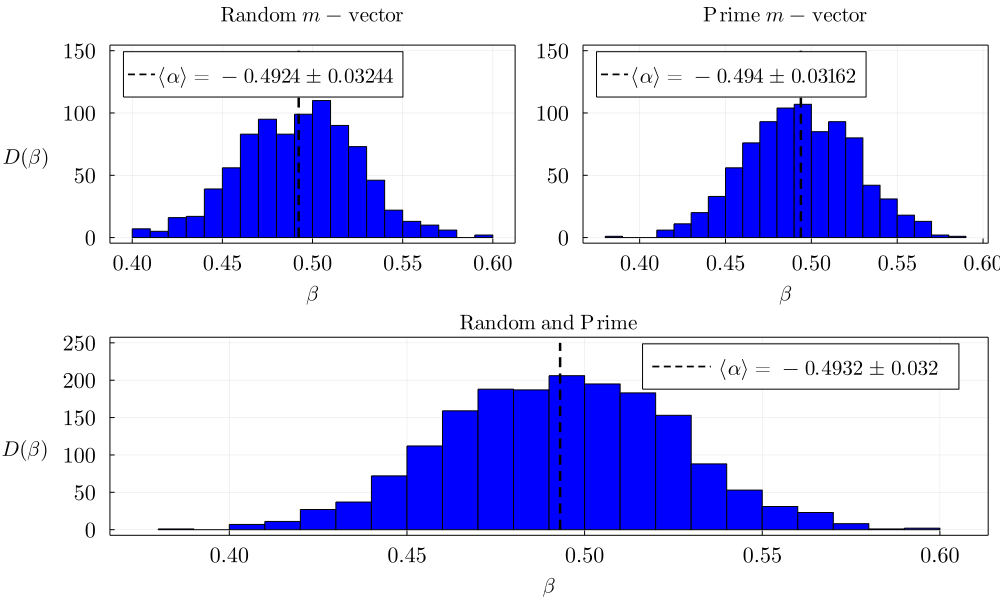

In [109]:
using DelimitedFiles
using CurveFit

mVectorSize = 180
MaxRand = 10
maximumPrimeBlockSize =  6
types = ["Random","Prime"]
fsize = 14

plots  = plot(layout = (1,2), size = (1200,250), top_margin = 5mm,)

tipo = "Random"
power_law = []
for j in 2:maximumPrimeBlockSize
    primeBlockSize = j
    for k in 1:factorial(primeBlockSize)
        fit = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/DFA_STATIONARY_FIT/fit_dfa_stationary_n_0_$(k)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(primeBlockSize).csv")
        power_law = vcat(power_law,fit[2])
    end
end
average = mean(power_law)
stdDeviation = std(power_law)
plots = histogram!(power_law, subplot = 1,  bins = 30, size = (1200,200), title = L"\mathrm{%$(tipo)} \ m-\mathrm{vector}",
            c=:blue, fontfamily = "Computer Modern", xlabel = L"\beta", ylabel = L"D(\beta)", yguidefontrotation = -90,
            legendfontsize = fsize, yguidefontsize = fsize, xguidefontsize = fsize, tickfontsizes = fsize,
            left_margin = 10mm, framestyle = :box, legendposition = :topleft,
            label = :false)
plots = plot!([mean(power_law);mean(power_law)],[0;150], subplot = 1, ls = :dash, lw = 2.5, lc = :black, label = label = L"\langle\alpha\rangle =  %$(-Float16(average)) \pm %$(Float16(stdDeviation[1]))")

tipo = "Prime"
power_law = []
for j in 2:maximumPrimeBlockSize
    primeBlockSize = j
    for k in 1:factorial(primeBlockSize)
        fit = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/DFA_STATIONARY_FIT/fit_dfa_stationary_n_0_$(k)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(primeBlockSize).csv")
        power_law = vcat(power_law,fit[2])
    end
end
average = mean(power_law)
stdDeviation = std(power_law)
plots = histogram!(power_law, subplot = 2, bins = 20, title = L"\mathrm{%$(tipo)}\ m-\mathrm{vector}",
            c=:blue, fontfamily = "Computer Modern", xlabel = L"\beta", yguidefontrotation = -90,
            legendfontsize = fsize, yguidefontsize = fsize, xguidefontsize = fsize, tickfontsizes = fsize,
            framestyle = :box, legendposition = :topleft,
            label = :false)
plots = plot!([mean(power_law);mean(power_law)],[0;150], subplot = 2, ls = :dash, lw = 2.5, lc = :black, label = label = L"\langle\alpha\rangle =  %$(-Float16(average)) \pm %$(Float16(stdDeviation[1]))")

plots2 = plot()
types = ["Random", "Prime"]
power_law = []

for i in 1:length(types)
        tipo = types[i]
        for j in 2:maximumPrimeBlockSize
            primeBlockSize = j
            for k in 1:factorial(primeBlockSize)
                fit = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/DFA_STATIONARY_FIT/fit_dfa_stationary_n_0_$(k)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(primeBlockSize).csv")
                power_law = vcat(power_law,fit[2])
            end
        end
end
average = mean(power_law)
stdDeviation = std(power_law)
plots2 = histogram(power_law, 
    c=:blue, fontfamily = "Computer Modern", xlabel = L"\beta", ylabel = L"D(\beta)", yguidefontrotation = -90,
    legendfontsize = fsize, yguidefontsize = fsize, xguidefontsize = fsize, tickfontsizes = fsize,
    left_margin = 10mm, framestyle = :box, title = L"\mathrm{Random \ and \ Prime}",
    label = :false)
plots2 = plot!([mean(power_law);mean(power_law)],[0;250], ls = :dash, lw = 2.5, lc = :black, label = label = L"\langle\alpha\rangle=  %$(-Float16(average)) \pm %$(Float16(stdDeviation[1]))")

plotfinal = plot(plots, plots2, layout = (2,1), size = (1000,600), bottom_margin = 4mm)

plotfinal


(process:21948): GLib-GIO-WARNING **: 08:41:14.607: Unexpectedly, UWP app `6760NGPDFLab.PDFX_1.3.17.0_x64__sbe4t8mqwq93a' (AUMId `6760NGPDFLab.PDFX_sbe4t8mqwq93a!App') supports 32 extensions but has no verbs


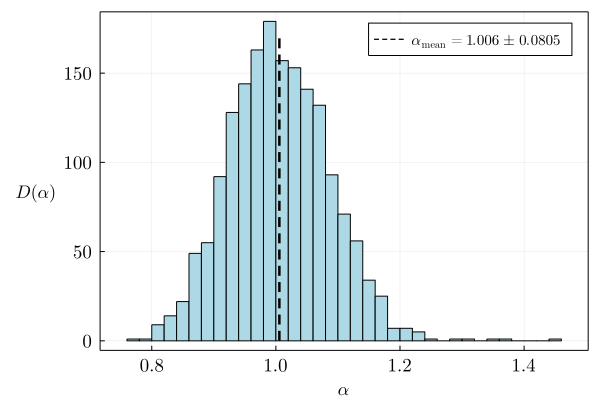

In [3]:
using Plots, LaTeXStrings, Plots.PlotMeasures
average = mean(fits)
stdDeviation = std(fits)
histogram(fits,
    c=:lightblue, fontfamily = "Computer Modern", xlabel = L"\alpha", ylabel = L"D(\alpha)", yguidefontrotation = -90,
    legendfontsize = 10, yguidefontsize = 12, xguidefontsize = 12, tickfontsizes = 12,
    left_margin = 10mm, framestyle = :box,
    label = :false)
plot!([mean(fits);mean(fits)],[0;170], ls = :dash, lw = 2.5, lc = :black, label = label = L"\alpha_{\mathrm{mean}} =  %$(Float16(average)) \pm %$(Float16(stdDeviation[1]))")

The average should be around $\alpha = 1/2$, but is in $\alpha = 1$, this does not respect the relation $\beta = 2\alpha -1$, once for these data $\beta = 0$, using $y_n = x_{n+1}-x_n$.

The codes bellow calculate the $\beta_{mean}$ for this set of data

In [6]:
include("D:/WINDOWS/Usuario/Documents/Collatz_map/Julia/DATA_ANALYSIS/POWER_SPECTRA/power_spectra_modules.jl")

import Main.PowerSpectra

mVectorSize = 180
MaxRand = 10
maximumPrimeBlockSize = 6
types = ["Random", "Prime"]
fits = []


for i in 1:length(types)
    tipo = types[i]
    for j in 2:maximumPrimeBlockSize
        primeBlockSize = j
        for k in 1:factorial(primeBlockSize)
            stationaryOrbit = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/STEP_STATIONARY/step_stationary_n_0_$(i)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(primeBlockSize).csv", header = false)
            freq = PowerSpectra.powerspectrum(stationaryOrbit)[1]
            ps = PowerSpectra.powerspectrum(stationaryOrbit)[2]
            fit = PowerSpectra.fitPowerSpectra(freq, ps)
            fits = vcat(fits,fit[2])
        end
    end
end
average = mean(fits)
stdDeviation = std(fits)

0.05566042087274968

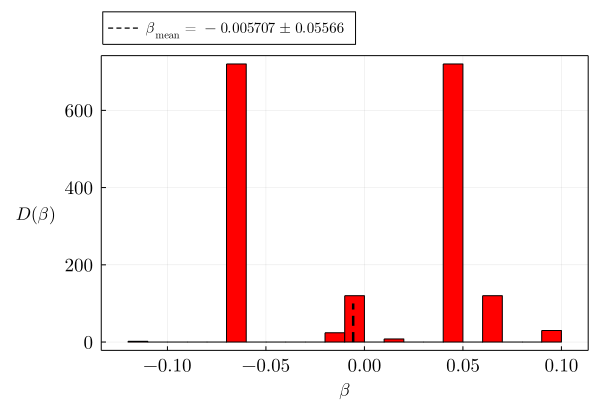

In [9]:
histogram(fits, bins = 20, c = :red,
    fontfamily = "Computer Modern", xlabel = L"\beta", ylabel = L"D(\beta)", yguidefontrotation = -90,
    legendfontsize = 10, yguidefontsize = 12, xguidefontsize = 12, tickfontsizes = 12,
    left_margin = 10mm, framestyle = :box,
    label = :false,  legend = :outertop)
plot!([mean(fits);mean(fits)],[0;100], ls = :dash, lw = 2.5, lc = :black, label = label = L"\beta_{\mathrm{mean}} =  %$(Float16(average)) \pm %$(Float16(stdDeviation[1]))")

In order to test if the DFA modules are calculating the correct exponents, I'll generate a Wiener random process and calculate the $\alpha$ and $\beta$ for the process.

My hypothesis is that if the DFA modules are correctly implemented, I will receive $\alpha = 1/2$ and $\beta = 0$. This would imply that the Collatz analysis is also correct, and the Collatz orbit does not obbey the general relation $\beta = 2\alpha - 1$. What would this imply? But if I don't receive $\alpha = 1/2$, this means that my code is wrong, and I should see where is my mistake!

First, importing the DFA modules

In [16]:
include("D:/WINDOWS/Usuario/Documents/Collatz_map/Julia/DATA_ANALYSIS/DFA/dfa_modules.jl")

Main.DFA

In [17]:
S = [1, -1]
L = 10^4
randomVector = rand(S, L)
transpose(randomVector)

1×10000 transpose(::Vector{Int64}) with eltype Int64:
 -1  1  -1  1  -1  -1  1  -1  -1  1  …  -1  -1  1  -1  -1  -1  -1  -1  1  1

In [20]:
using Main.DFA

data = DFA.dfa(randomVector)
n = data[1]
detrended = data[2]
fite = power_fit(n,detrended)
alpha = fite[2]

0.9827000189490404

Ok, my implementation is wrong, I'm receiving $\alpha \approx 1$ to a clearly Wiener Process, so the code implementation is wrong!

In the next blocks of code I will try to implement the steps of DFA module to test if they are doing what I expect

First: the integration process:

In [21]:
N = length(randomVector)

10000

In [22]:
meanOrbit = mean(randomVector)

0.019

In [25]:
integratedOrbit = zeros(N)
transpose(integratedOrbit)

1×10000 transpose(::Vector{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [26]:
sumOrbit = 0.0
sumMean = 0.0

0.0

In [29]:
for j in 1:N
    sumOrbit += randomVector[j]
    sumMean += meanOrbit
    integratedOrbit[j] = sumOrbit - sumMean
end
transpose(integratedOrbit)

1×10000 transpose(::Vector{Float64}) with eltype Float64:
 -1.019  -0.038  -1.057  -0.076  -1.095  …  -1.962  -0.981  -8.66862e-11

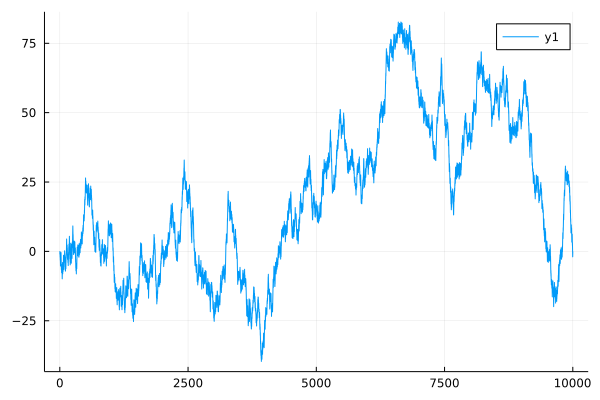

In [30]:
plot(integratedOrbit)

In order to testify that this integrated process is brownian, I'll find the power spectra:

In [31]:
freq = PowerSpectra.powerspectrum(integratedOrbit)[1]
ps = PowerSpectra.powerspectrum(integratedOrbit)[2]
fit = PowerSpectra.fitPowerSpectra(freq, ps)

(0.016238202719320492, -1.9964341633090141)

In fact, $\beta \approx -2$ for the integrated process, as it should be! The integration is correct, let's go to the detrended fluctuations

In [33]:
x = integratedOrbit
N = length(x)
fluctuations = []

Any[]

In [39]:
Δn₀ = 4
Δnₘ = div(length(x),2)
Δn = Δn₀
segmentation = zeros(div(N,Δn),Δn)

2500×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 ⋮              
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

In [40]:
segmentation[1,:] = x[1:Δn]

4-element Vector{Float64}:
 -1.019000000032122
 -0.038000000032127446
 -1.057000000032133
 -0.07600000003213836

In [41]:
for i in 1:div(N,Δnₘ)-1
    segmentation[i+1,:] = x[i*Δn+1:i*Δn+Δn]
end
segmentation

2500×4 Matrix{Float64}:
 -1.019  -0.038  -1.057  -0.076
 -1.095  -2.114  -1.133  -2.152
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  ⋮                      
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0
  0.0     0.0     0.0     0.0

In [43]:
difSegmentToFit = zeros(N);

In [47]:
for j in 1:div(N,Δn)
    dn = range((j-1)*Δn+1,j*Δn)
    segment = segmentation[j,:]
    fit = linear_fit(dn, segment)
    segmentFit = fit[1] .+ fit[2].*dn
    difSegmentToFit[dn] = (segment .- segmentFit).^2
end
transpose(difSegmentToFit)

1×10000 transpose(::Vector{Float64}) with eltype Float64:
 0.04  0.36  0.36  0.04  0.04  0.36  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [48]:
fluctuation = sqrt(sum(difSegmentToFit)/N)

0.012649110640673518

In [49]:
detrended[1]

0.012649110640673518

I found out the problem, very naive mistake in the counter of the segmentation loop, that was generating segmentations with lots of zeros, this makes no sense!!! I'll correct it and run the codes again :s

In [85]:
include("D:/WINDOWS/Usuario/Documents/Collatz_map/Julia/DATA_ANALYSIS/DFA/dfa_modules.jl")

Main.DFA

In [17]:
using Plots, LaTeXStrings, Plots.PlotMeasures
using StatsBase
using DelimitedFiles
using CurveFit

In [74]:
S = [1, -1]
L = 3*10^4
randomVector = rand(S, L)
transpose(randomVector)

1×30000 transpose(::Vector{Int64}) with eltype Int64:
 1  1  -1  -1  -1  -1  1  1  1  -1  1  …  1  -1  1  -1  -1  -1  -1  -1  1  1

In [27]:
using Main.DFA

data = DFA.dfa(randomVector)
n = data[1]
detrended = data[2]
fite = power_fit(n,detrended)
alpha = fite[2]

0.4773390366910865

Now the codes are correct and I'm receiving $\alpha \approx 1/2$ as it should be!!!!!!!

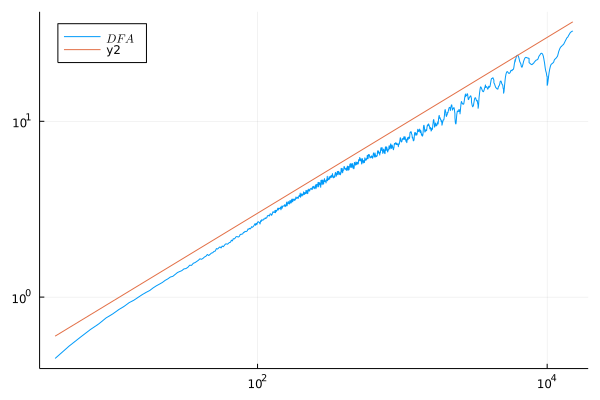

In [28]:
plot(n,detrended, yscale = :log10, xscale = :log10, legendposition = :topleft, label = L"DFA")
plot!(n, 0.3*n.^(0.5))

Finally I can conclude the analysis repeating the initial histogram for $\alpha$

In [105]:
using StatsBase
using DelimitedFiles
using CurveFit
using Plots, LaTeXStrings, Plots.PlotMeasures

mVectorSize = 180
MaxRand = 10
maximumPrimeBlockSize = 6
types = ["Random","Prime"]
fits = []

for i in 1:length(types)
    tipo = types[i]
    for j in 2:maximumPrimeBlockSize
        primeBlockSize = j
        for k in 1:factorial(primeBlockSize)
            fit = readdlm("D:/WINDOWS/Usuario/Documents/Collatz_map/DATA/DFA_STATIONARY_FIT/fit_dfa_stationary_n_0_$(k)_$(tipo)_mVectorSize_$(mVectorSize)_MaxRand_$(MaxRand)_primeBlockSize_$(j).csv")
            fits = vcat(fits,fit[2])
        end
    end
end
transpose(fits)

1×1744 transpose(::Vector{Any}) with eltype Any:
 0.511596  0.448614  0.496134  0.530806  …  0.544953  0.523787  0.531976

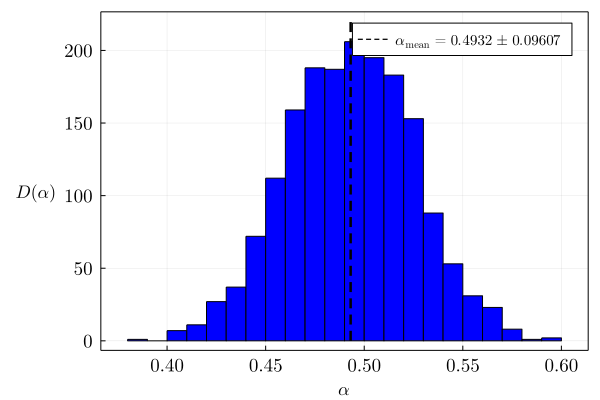

In [107]:
average = mean(fits)
stdDeviation = std(fits)
histogram(fits,
    c=:blue, fontfamily = "Computer Modern", xlabel = L"\alpha", ylabel = L"D(\alpha)", yguidefontrotation = -90,
    legendfontsize = 10, yguidefontsize = 12, xguidefontsize = 12, tickfontsizes = 12,
    left_margin = 10mm, framestyle = :box,
    label = :false)
plot!([mean(fits);mean(fits)],[0;220], ls = :dash, lw = 2.5, lc = :black, label = label = L"\alpha_{\mathrm{mean}} =  %$(Float16(average)) \pm %$(3*Float16(stdDeviation[1]))")

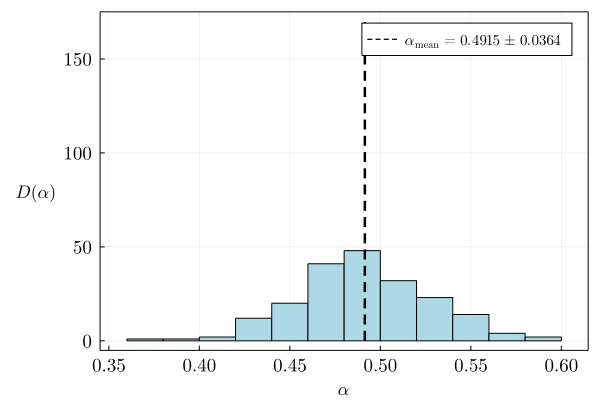

In [98]:
L = 3000
fits = []
for i in 1:200
    randomVector = rand(S, L)
    data = DFA.dfa(randomVector)
    n = data[1]
    detrended = data[2]
    fite = DFA.fitdfa(n,detrended)
    fits = vcat(fits,fite[2])
end
average = mean(fits)
stdDeviation = std(fits)
histogram(fits,
    c=:lightblue, fontfamily = "Computer Modern", xlabel = L"\alpha", ylabel = L"D(\alpha)", yguidefontrotation = -90,
    legendfontsize = 10, yguidefontsize = 12, xguidefontsize = 12, tickfontsizes = 12,
    left_margin = 10mm, framestyle = :box,
    label = :false)
plot!([mean(fits);mean(fits)],[0;170], ls = :dash, lw = 2.5, lc = :black, label = label = L"\alpha_{\mathrm{mean}} =  %$(Float16(average)) \pm %$(Float16(stdDeviation[1]))")

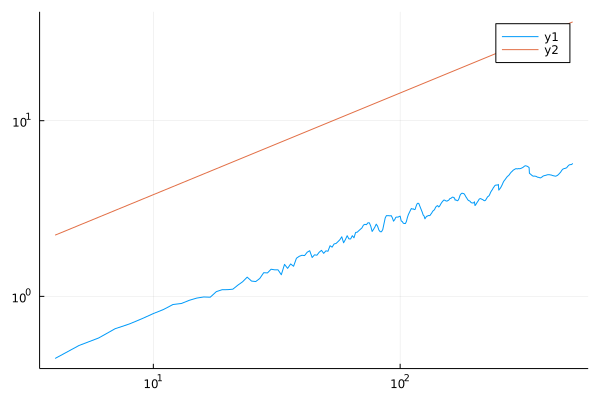

In [87]:
L = 1000
randomVector = rand(S, L)
data = DFA.dfa(randomVector)
n = data[1]
detrended = data[2]
fit = DFA.fitdfa(n, detrended)
plot(n,detrended, yscale = :log10, xscale = :log10)
plot!(n, n.^(fit[2]))

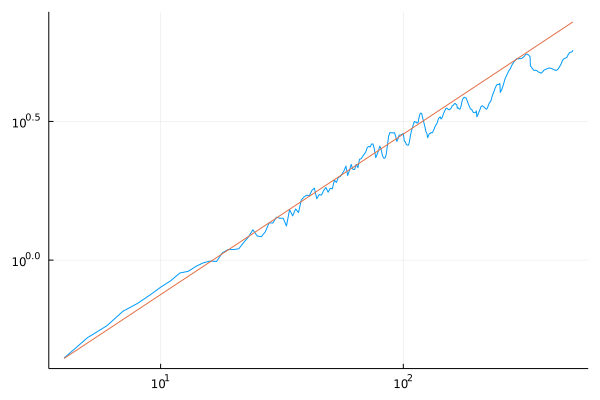

In [88]:
fit[2]
plot(n,detrended, yscale = :log10, xscale = :log10, label = false)
plot!(n, fit[1]n.^(fit[2]), label = false)

In [89]:
fit[2]

0.5788057432093604